# Лабораторная работа 4. Модель линейной регрессии.

## Reading data and plot scatter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
data = pd.read_excel('data.xlsx')
data.head()
data['h^2'] = data['Height']**2
data['w^2'] = data['Weight']**2
data['h*w'] = np.multiply(data['Height'], data['Weight'])
data

,Height,Weight,h^2,w^2,h*w
0,65.78331,112.9925,4327.443875,12767.305056,7433.020655
1,71.51521,136.4873,5114.425261,18628.783061,9760.917922
2,69.39874,153.0269,4816.185114,23417.232124,10619.874046
3,68.21660,142.3354,4653.504516,20259.366093,9709.637048
4,67.78781,144.2971,4595.187185,20821.653068,9781.584398
...,...,...,...,...,...
195,65.79799,120.8431,4329.375488,14603.054818,7951.233085
196,66.10558,115.7813,4369.947707,13405.309430,7653.789990
197,68.23987,128.3019,4656.679858,16461.377544,8755.304977
198,68.02403,127.4718,4627.268657,16249.059795,8671.145547


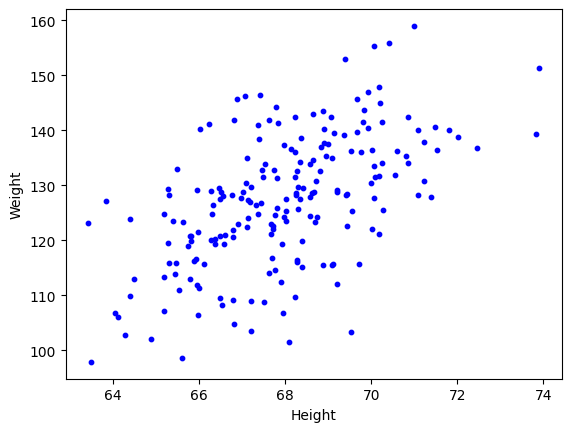

In [77]:
pd.DataFrame(data).plot.scatter(x='Height', y ='Weight', c='blue', s=10)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Кореляционное облако указывает на линейную зависимость параметров

## Creating intervals  correlation table

In [78]:
h = data['Height']
w = data['Weight']

df = data.copy()
inter_h = pd.cut(h, bins=10, include_lowest=True)
inter_w = pd.cut(w, bins=10, include_lowest=True)
df['intervals_height'] = inter_h
df['intervals_weight'] = inter_w
df

,Height,Weight,intervals_height,intervals_weight
0,65.78331,112.9925,"(65.521, 66.568]","(110.113, 116.218]"
1,71.51521,136.4873,"(70.758, 71.806]","(134.534, 140.64]"
2,69.39874,153.0269,"(68.663, 69.711]","(152.851, 158.956]"
3,68.21660,142.3354,"(67.616, 68.663]","(140.64, 146.745]"
4,67.78781,144.2971,"(67.616, 68.663]","(140.64, 146.745]"
...,...,...,...,...
195,65.79799,120.8431,"(65.521, 66.568]","(116.218, 122.324]"
196,66.10558,115.7813,"(65.521, 66.568]","(110.113, 116.218]"
197,68.23987,128.3019,"(67.616, 68.663]","(122.324, 128.429]"
198,68.02403,127.4718,"(67.616, 68.663]","(122.324, 128.429]"


In [105]:
corr_table = pd.crosstab(
    index=df['intervals_height'],
    columns=df['intervals_weight'],
    rownames=['intervals_height'],
    colnames=['intervals_weight'])
corr_table

intervals_weight,"(97.83999999999999, 104.007]","(104.007, 110.113]","(110.113, 116.218]","(116.218, 122.324]","(122.324, 128.429]","(128.429, 134.534]","(134.534, 140.64]","(140.64, 146.745]","(146.745, 152.851]","(152.851, 158.956]"
intervals_height,,,,,,,,,,
"(63.414, 64.473]",2,3,0,0,3,0,0,0,0,0
"(64.473, 65.521]",1,1,5,1,3,2,0,0,0,0
"(65.521, 66.568]",1,3,5,11,5,4,1,1,0,0
"(66.568, 67.616]",1,4,0,4,10,6,2,5,0,0
"(67.616, 68.663]",1,2,5,6,13,10,5,5,0,0
"(68.663, 69.711]",1,0,4,0,6,5,10,3,0,1
"(69.711, 70.758]",0,0,1,2,2,6,4,4,2,2
"(70.758, 71.806]",0,0,0,0,2,2,6,1,0,1
"(71.806, 72.854]",0,0,0,0,0,0,2,0,0,0


In [106]:
mid_h = [inter.mid for inter in corr_table.index]
mid_w = [inter.mid for inter in corr_table.columns]

## Conditional expectation

In [138]:
cond_exp_w = pd.DataFrame(index=corr_table.index)
exp_w = []
for inter_h in corr_table.index:
    expw = 0
    count = 0
    for inter_w in corr_table.columns:
        expw += (corr_table.loc[inter_h][inter_w]*inter_w.mid)
        count += corr_table.loc[inter_h][inter_w]
    exp_w.append(expw/count)
exp_w
cond_exp_w['exp_w'] = exp_w
cond_exp_w

,exp_w
intervals_height,
"(63.414, 64.473]",112.394563
"(64.473, 65.521]",117.859577
"(65.521, 66.568]",120.451613
"(66.568, 67.616]",126.329313
"(67.616, 68.663]",126.544766
"(68.663, 69.711]",130.870100
"(69.711, 70.758]",135.994370
"(70.758, 71.806]",136.569500
"(71.806, 72.854]",137.587000


In [140]:
cond_exp_h = pd.DataFrame(index=corr_table.columns)
exp_h = []
for inter_w in corr_table.columns:
    exph = 0
    count = 0
    for inter_h in corr_table.index:
        exph += (corr_table.loc[inter_h][inter_w]*inter_h.mid)
        count += corr_table.loc[inter_h][inter_w]
    exp_h.append(exph/count)
exp_h
cond_exp_h['exp_h'] = exp_h
cond_exp_h

,exp_h
intervals_weight,
"(97.83999999999999, 104.007]",66.192429
"(104.007, 110.113]",66.123692
"(110.113, 116.218]",67.144375
"(116.218, 122.324]",67.048354
"(122.324, 128.429]",67.543920
"(128.429, 134.534]",68.229286
"(134.534, 140.64]",69.660113
"(140.64, 146.745]",68.525421
"(146.745, 152.851]",71.282167


Условные средние при возрастании роста/веса возрастают, за исключением одного случая. Это связано с тем, что линейная зависиомсть слабая.

## Coeffs a, b